**IMPLEMENTACIÓN DE LA VALIDACIÓN CRUZADA EN PYTHON:**


**Función Escrita por:** Heber Hernández Guerra (2020).

**Nombre de la función (identificador):** validacion_cruzada()

**Parametros de la función:** DataFrame de nombre "df" con X, Y, VA

**Bibliotecas utilizadas**: Pandas, Numpy, Matplotlib y Scipy

**Espacio de interpolación:** 2D

**Otras observaciones:** Ejemplo realizado con una función de base radial del tipo lineal.

In [1]:
import pandas as pd                                       # Biblioteca para manipulación de marcos de datos
import numpy as np                                        # Biblioteca de funciones matemáticas
import matplotlib.pyplot as plt                           # Biblioteca para salida gráfica
from scipy.interpolate import Rbf                         # Biblioteca con algoritmos de interpolación 

In [2]:
 def validacion_cruzada(df): #función que devuelve un scatterplot con los resultados de la VC leave one out.
        iteration = {} 
        for i in range(len(df)): 
            #En la siguiente linea se crearan tantos DF como observaciones tenga la variable de interés.
            #Dejando con valores nulos una fila a la vez. 
            iteration["df_{}".format(i)] = pd.DataFrame(df[~df.isin(df.loc[lambda df: df['ID'] == i])])
        for i in range(len(df)): 
            #En la siguiente linea se borraran las filas nulas, quedando N DF con n-1 filas. 
            iteration["df_{}".format(i)].dropna(inplace=True) 
        #En el siguiente bloque se crearan 3 variables que almacenaran de forma independiente la información de n-1 filas.    
        x = {}; y = {}; z = {}
        for i in range(len(df)):    
            x["{}".format(i)] = iteration["df_{}".format(i)]["X"] #Serie de valores de la variable X sin contar Xi
            y["{}".format(i)] = iteration["df_{}".format(i)]["Y"]
            z["{}".format(i)] = iteration["df_{}".format(i)]["VA"]
        #En el siguiente bloque se crearan 3 variables que almacenaran de forma independiente la información de n-(n-1) filas.
        xi = {}
        yi = {}
        zi = {}
        for i in range(len(df)):    
            xi["{}".format(i)] = df["X"][df["ID"]==i]
            yi["{}".format(i)] = df["Y"][df["ID"]==i]
            zi["{}".format(i)] = df["VA"][df["ID"]==i]
        # Para esta versión de la función validación cruzada(), solo esta incorporado la RBF. 
        rbf = {}
        for i in range(len(df)):
            #Se entrena un modelo de interpolación mediante una función de base radial del tipo "lineal"
            rbf["{}".format(i)] = Rbf(x["{}".format(i)], y["{}".format(i)], z["{}".format(i)], function="Linear")
        ZI = {}
        for i in range(len(df)): 
            #La estimación de cada punto o fila, se almacena en ZI(i). 
            ZI["{}".format(i)] = rbf["{}".format(i)](xi["{}".format(i)], yi["{}".format(i)])
        lista = [ZI["{}".format(i)][0] for i in range(len(df))] #lista con interpolaciones para validación cruzada LOO.
        df["Cross"] = lista #Se guarda la lista con interpolaciones CV en una nueva columna del DF.
        xx = df["Cross"]
        yy = df["VA"]
        #Calculando los coeficientes del ajuste de regresión:
        a, b = np.polyfit(xx, yy, 1) # 1 es el grado del polinomio
        r = np.corrcoef(xx, yy) # r = coeficiente de correlación
        #print("R:", r, "a:", a, "b:", b) # b: pendiente de la recta, a: ordenada en la vertical (Y = bX + a)
        plt.subplot(111)
        plt.scatter(xx, yy, color="b", s=50)
        plt.xlabel("Variable estimada")
        plt.ylabel("Variable verdadera (muestra)")
        plt.title("Validación Cruzada")
        plt.plot(xx, a * xx + b, color="skyblue")
        plt.text(df["Cross"].min()*1.01,df["VA"].max()*1, 'r = {0:2.2f}'.format(r[0,1]))
        plt.text(df["Cross"].min()*1.01,df["VA"].max()*0.99, 'Y = {0:2.2f} X + {1:2.3f}'.format(a,b))
        plt.subplots_adjust(left=0.0, bottom=0.0, right=1.6, top=1.6, wspace=0.2, hspace=0.2)
        plt.show()        

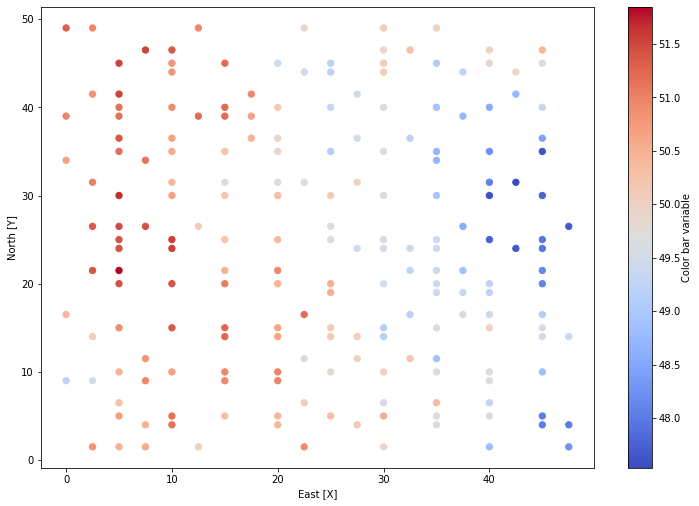

In [3]:
df = pd.read_csv("C:/Users/Heber/Documents/heber/Desktop/ADEP/unidad_7/" + "sample_crossvalidation.csv")
# df = pd.read_csv("C:/Users/Heber/Documents/heber/Desktop/ADEP/unidad_7/" + "sample_crossvalidation.csv")
plt.subplot(111)
plt.scatter(df["X"], df["Y"], s=40, marker="o",c=df["VA"], cmap = plt.cm.coolwarm)
plt.xlabel('East [X]')
plt.ylabel('North [Y]')
cbar=plt.colorbar()
cbar.set_label('Color bar variable', labelpad=+1)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.6, top=1.6, wspace=0.2, hspace=0.2)
plt.show()

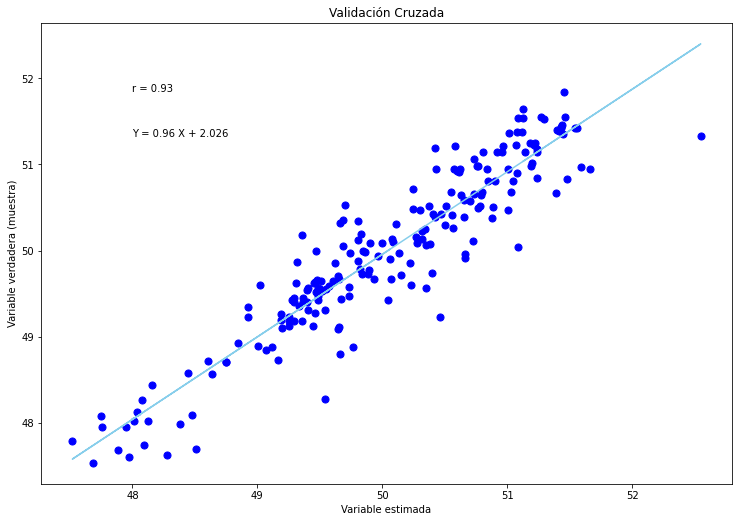

In [4]:
validacion_cruzada(df)